In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns

In [2]:
# Importando dados
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
# Exibindo os dados
display(train.head())
display(test.head())

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [4]:
#Análise dos conjuntos de dados para observar a distribuição dos atributos
display(train.describe())
display(test.describe())

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,8.928160e+05,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,...,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,7.441535e+05,1.902371,1.358613,4.413734,0.417361,0.408132,0.393246,0.257191,0.163659,0.185905,...,5.438478,1.440265,2.875013,7.540367,0.123720,0.627756,0.554660,0.287796,0.349344,0.152428
std,4.296830e+05,1.986503,0.663002,2.700149,0.493453,1.355068,0.488471,0.437086,0.369966,0.389030,...,2.330081,1.200620,1.694072,2.745882,0.329262,0.483403,0.497004,0.452736,0.476763,0.359435
min,0.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.720218e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.443070e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.116308e+06,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488026e+06,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,20.000000,11.000000,15.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data = []
for f in train.columns:
    # definindo o uso (entre rótulo, id e atributos)
    if f == 'target':
        role = 'target' # rótulo
    elif f == 'id':
        role = 'id'
    else:
        role = 'input' # atributos
         
    # definindo o tipo do dado
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # mantem keep como verdadeiro pra tudo, exceto id
    keep = True
    if f == 'id':
        keep = False
    
    # cria o tipo de dado
    dtype = train[f].dtype
    
    # cria dicionário de metadados
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [6]:
# Valores faltantes Treino
atributos_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        atributos_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Atributo {} tem {} amostras ({:.2%}) com valores faltantes'.format(f, missings, missings_perc))
        
print('No total, há {} atributos com valores faltantes'.format(len(atributos_missing)))

Atributo ps_ind_02_cat tem 216 amostras (0.04%) com valores faltantes
Atributo ps_ind_04_cat tem 83 amostras (0.01%) com valores faltantes
Atributo ps_ind_05_cat tem 5809 amostras (0.98%) com valores faltantes
Atributo ps_reg_03 tem 107772 amostras (18.11%) com valores faltantes
Atributo ps_car_01_cat tem 107 amostras (0.02%) com valores faltantes
Atributo ps_car_02_cat tem 5 amostras (0.00%) com valores faltantes
Atributo ps_car_03_cat tem 411231 amostras (69.09%) com valores faltantes
Atributo ps_car_05_cat tem 266551 amostras (44.78%) com valores faltantes
Atributo ps_car_07_cat tem 11489 amostras (1.93%) com valores faltantes
Atributo ps_car_09_cat tem 569 amostras (0.10%) com valores faltantes
Atributo ps_car_11 tem 5 amostras (0.00%) com valores faltantes
Atributo ps_car_12 tem 1 amostras (0.00%) com valores faltantes
Atributo ps_car_14 tem 42620 amostras (7.16%) com valores faltantes
No total, há 13 atributos com valores faltantes


In [7]:
# Valores faltantes teste
atributos_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        atributos_missing.append(f)
        missings_perc = missings/test.shape[0]
        
        print('Atributo {} tem {} amostras ({:.2%}) com valores faltantes'.format(f, missings, missings_perc))
        
print('No total, há {} atributos com valores faltantes'.format(len(atributos_missing)))

Atributo ps_ind_02_cat tem 216 amostras (0.02%) com valores faltantes
Atributo ps_ind_04_cat tem 83 amostras (0.01%) com valores faltantes
Atributo ps_ind_05_cat tem 5809 amostras (0.65%) com valores faltantes
Atributo ps_reg_03 tem 107772 amostras (12.07%) com valores faltantes
Atributo ps_car_01_cat tem 107 amostras (0.01%) com valores faltantes
Atributo ps_car_02_cat tem 5 amostras (0.00%) com valores faltantes
Atributo ps_car_03_cat tem 411231 amostras (46.06%) com valores faltantes
Atributo ps_car_05_cat tem 266551 amostras (29.86%) com valores faltantes
Atributo ps_car_07_cat tem 11489 amostras (1.29%) com valores faltantes
Atributo ps_car_09_cat tem 569 amostras (0.06%) com valores faltantes
Atributo ps_car_11 tem 5 amostras (0.00%) com valores faltantes
Atributo ps_car_12 tem 1 amostras (0.00%) com valores faltantes
Atributo ps_car_14 tem 42620 amostras (4.77%) com valores faltantes
No total, há 13 atributos com valores faltantes


In [8]:
# removendo ps_car_03_cat e ps_car_05_cat que tem muitos valores faltantes
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train = train.drop(vars_to_drop, axis=1)
test = test.drop(vars_to_drop, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # atualiza os metadados para ter como referência (processar o test depois)

In [9]:
from sklearn.preprocessing import Imputer

media_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
moda_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = media_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = media_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = media_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = moda_imp.fit_transform(train[['ps_car_11']]).ravel()

test['ps_reg_03'] = media_imp.fit_transform(test[['ps_reg_03']]).ravel()
test['ps_car_12'] = media_imp.fit_transform(test[['ps_car_12']]).ravel()
test['ps_car_14'] = media_imp.fit_transform(test[['ps_car_14']]).ravel()
test['ps_car_11'] = moda_imp.fit_transform(test[['ps_car_11']]).ravel()

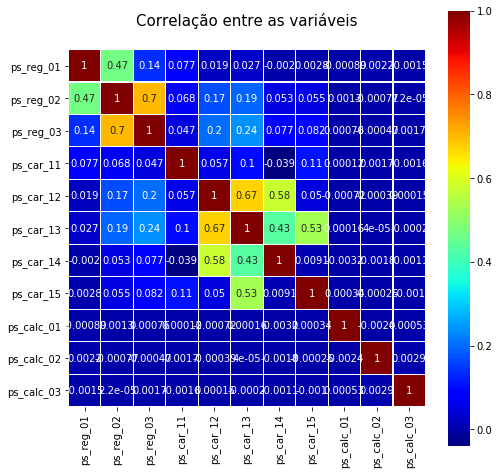

In [10]:
# Correlação entre as variáveis do dataset
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])
Counter(train.dtypes.values)

colormap = plt.cm.jet
plt.figure(figsize=(8,8))
plt.title('Correlação entre as variáveis', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

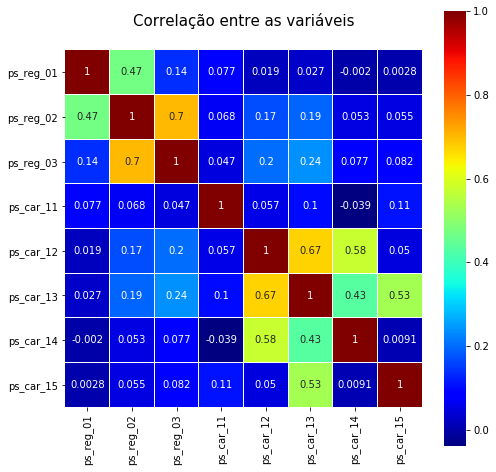

In [12]:
# Como podemos observar, o ps_calc_01, 2 e 3 não tem correlação nenhuma, portanto vamos iliminar esses atributos.
colormap = plt.cm.jet
cotrain_float = train_float.drop(['ps_calc_03', 'ps_calc_02', 'ps_calc_01'], axis=1)
plt.figure(figsize=(8,8))
plt.title('Correlação entre as variáveis', y=1.05, size=15)
sns.heatmap(cotrain_float.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [13]:
# Algoritmos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Opções de teste e métrica de avaliação
num_folds = 10
scoring = 'accuracy'
seed = 42

X = train.drop(['id','target'], axis=1)
Y = train.target

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size= 0.3, random_state=seed)

In [ ]:
models = [('LR', LogisticRegression()), 
          ('KNN', KNeighborsClassifier()),
          ('LinearRegression', LinearRegression())]
results = []
names = []
for name, model in models:
    print("Modelo: %s" %(name))
    model.fit(X_train, Y_train)
    result = model.score(X_validation, Y_validation)
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Classificado %s: %f" % (name, result)
    print(msg)
print("Treinamento finalizado!")

Modelo: LR
Classificado LR: 0.963122
Modelo: KNN
